In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
import random as rand
import math
#fig, ax = plt.subplots(figsize=(20,10))

In [269]:
#simulation parameters
xlim = 4
ylim = 4
N = 2 #particles
error_spawn_ct = 0 #count of failed spawns

In [275]:
class Atom():
    def __init__(self, x, y):
        pass
        

class Hydrogen(Atom):
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Oxygen(Atom):
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Particle():
    def __init__(self, system):
        '''
        Calls the spawn method
        Parameters:
        system is a reference to a list that contains information of all the particles and their coordinates
        '''
        self.vdw = 3
        self.Spawn()

    def Draw(self):
        '''
        draw the particle. returns none
        '''
        plt.scatter(self.x, self.y)
        plt.axis([0, xlim, 0, ylim])
    
    def Check_VDW(self):
        '''
        returns True if there exists a particle within self's vdw radius
        '''
        return ((particle.x - self.x)**2 + (particle.y - self.y)**2)**(1/2) <= (self.vdw + particle.vdw)

    def Spawn(self):
        '''
        Attempts to generate valid x,y positions for itself. Uses system list to identify valid positions. If no valid position
        is found, the particle is garbage collected(?)
        '''
        for attempt in range(N+50):
            self.x = rand.uniform(0, xlim)
            self.y = rand.uniform(0, ylim)
            if not any((self.x, self.y) == (particle.x, particle.y) or self.Check_VDW() for particle in system):
                #if particle spawns on top of another one or it is too close to another particle then attempt a new spawn
                break

        else:
            print("Molecule failed to spawn!")
            return None #i think so long as system doesnt append the object when it fails to spawn, no reference therefore will be garbage collected??
        system.append(self)
        print("Particle spawned!")


Particle spawned!
Molecule failed to spawn!


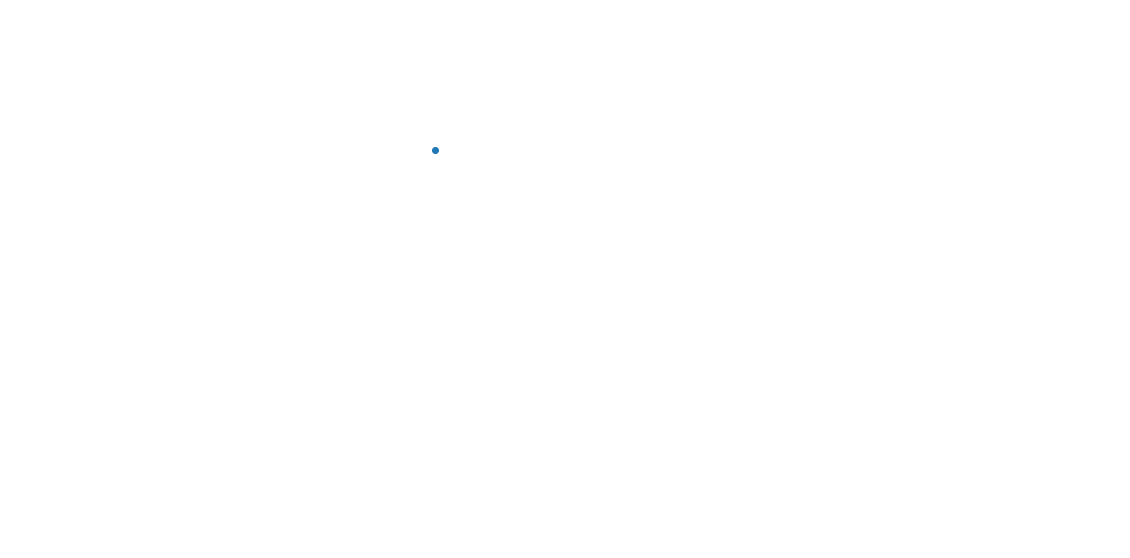

In [278]:
fig, ax = plt.subplots(figsize=(20,10))
plt.axis('off')
plt.xlim(0, 100)
plt.ylim(0, 100)
system = [] #list containing all obj

#randomly generate 50 particles
for i in range(N):
    Particle(system)

for particle in system:
    particle.Draw()

if len(system) > 1:
    print(((system[0].x - system[1].x)**2 + (system[0].y - system[1].y)**2)**(1/2))